In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm

# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

: 

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA-Challenge/voitures-par-commune-par-energie.csv', sep=';')
df = pd.read_csv('voitures-par-commune-par-energie.csv', sep=';')

: 

In [6]:
df = df[['libgeo', 'date_arrete', 'nb_vp_rechargeables_el']]
df['date_arrete'] = pd.to_datetime(df['date_arrete'])
df = df.sort_values(by = ['libgeo', 'date_arrete'])
df = df.dropna(axis=0)
df

c:\Users\ilyes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ilyes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/09/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ilyes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30/06/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ilyes\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31/12/2020' in DD/MM/YYYY format. Provide format or specif

,libgeo,date_arrete,nb_vp_rechargeables_el
197660,AAST,2020-12-31,2.0
251050,AAST,2021-03-31,2.0
36794,AAST,2021-06-30,2.0
197661,AAST,2021-09-30,2.0
197662,AAST,2021-12-31,2.0
...,...,...,...
178650,Ô-DE-SELLE,2021-09-30,7.0
178651,Ô-DE-SELLE,2021-12-31,10.0
17727,Ô-DE-SELLE,2022-03-31,12.0
234432,Ô-DE-SELLE,2022-06-30,15.0


In [7]:
len = len(df['libgeo'].unique())

In [8]:
df21_mar = df[df['date_arrete'] == datetime.datetime(2021,3,31)]
df21_jun = df[df['date_arrete'] == datetime.datetime(2021,6,30)]
df21_sep = df[df['date_arrete'] == datetime.datetime(2021,9,30)]
df21_dec = df[df['date_arrete'] == datetime.datetime(2021,12,31)]

df20_dec = df[df['date_arrete'] == datetime.datetime(2020,12,31)]
df22_sep = df[df['date_arrete'] >= datetime.datetime(2022,9,30)]

In [9]:
print('2020 :', df20_dec['nb_vp_rechargeables_el'].sum())
print('2021 :', df21_dec['nb_vp_rechargeables_el'].sum())
print('2022 - sep :', df22_sep['nb_vp_rechargeables_el'].sum())

2020 : 414963.0
2021 : 725976.0
2022 - sep : 960396.0


In [10]:
# milliers
total_ve = {2010: 0.1, 2011: 1.8, 2012: 7.1, 2013: 16.2, 2014: 27.9, 2015: 49.6, 2016: 79.0, 2017: 118.3, 2018: 171.8, 2019: 241.4, 2020: 439.2, 2021: 756.4, 2022: 1102.9}

total_ve

{2010: 0.1,
 2011: 1.8,
 2012: 7.1,
 2013: 16.2,
 2014: 27.9,
 2015: 49.6,
 2016: 79.0,
 2017: 118.3,
 2018: 171.8,
 2019: 241.4,
 2020: 439.2,
 2021: 756.4,
 2022: 1102.9}

In [11]:
df_old = df.copy()
df_old = df_old.drop(df_old.index)

dfs = {3: df21_mar, 6: df21_jun, 9: df21_sep, 12: df21_dec}

def per_ve(geo, m):
  # ratio of ve from geo to total national
  df21 = dfs[m]
  tot_21_ve = int(df21['nb_vp_rechargeables_el'].sum())
  tot_geo = int(df21[df21['libgeo'] == geo]['nb_vp_rechargeables_el'].sum())
  p = (tot_geo) / (tot_21_ve)
  return p

def ve(geo, y, m):
  # on considère que le nombre ne change pas au cours de l'année : il faudrait interpoler pour avoir des valeurs totales par trimestre
  # nb ve in y
  t = total_ve[y]*1000
  # nb of ve for geo in y
  nb = per_ve(geo, m)*t
  nb=int(nb)
  return nb

def fill(start_year, end_year):
  libgeo = []
  date_arrete = []
  nb_vp_rechargeables_el = []

  months = [3, 6, 9, 12]
  days = [31, 30, 30, 31]

  # progress bar
  pbar = tqdm(total=len, desc='Communes traitées')

  for geo in df['libgeo'].unique():
    for y in range(start_year, end_year+1):
      for m,d in zip(months, days):
        libgeo.append(geo)
        date_arrete.append(datetime.date(y,m,d))
        nb_vp_rechargeables_el.append(ve(geo, y, m))
    pbar.update(1)

  pbar.close()

  df_old['libgeo'] = libgeo
  df_old['date_arrete'] = date_arrete
  df_old['nb_vp_rechargeables_el'] = nb_vp_rechargeables_el
  
  return df_old

In [12]:
ve_communes = fill(2014, 2022)
ve_communes.to_csv('ve_par_commune1.csv', index=False)
# files.download('ve_par_commune.csv')

Communes traitées: 100%|██████████| 32752/32752 [2:17:01<00:00,  3.98it/s]     


Text(0, 0.5, 'En Millions')

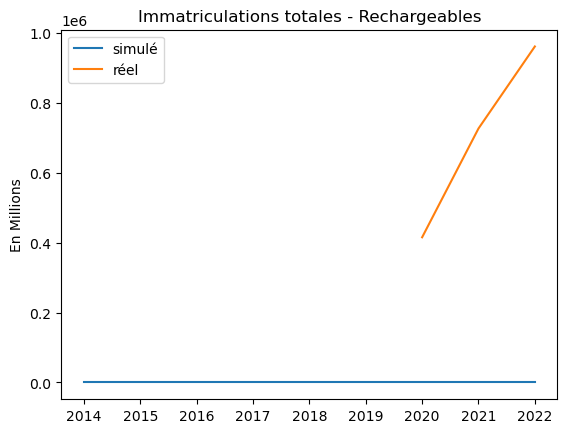

In [13]:
totaux = []
années = [int(i) for i in range(2014, 2023)]
for i in années:
  totaux.append(int(ve_communes[ve_communes['date_arrete'] == datetime.datetime(i,12,31)]['nb_vp_rechargeables_el'].sum()))

plt.plot(années, totaux, label ='simulé')
plt.plot([2020, 2021, 2022], [df20_dec['nb_vp_rechargeables_el'].sum(), df21_dec['nb_vp_rechargeables_el'].sum(), df22_sep['nb_vp_rechargeables_el'].sum()], label = 'réel')
plt.title('Immatriculations totales - Rechargeables')
plt.legend()
plt.ylabel('En Millions')

In [14]:
ve_communes

,libgeo,date_arrete,nb_vp_rechargeables_el
0,AAST,2014-03-31,0.116568
1,AAST,2014-06-30,0.099131
2,AAST,2014-09-30,0.088684
3,AAST,2014-12-31,0.076862
4,AAST,2015-03-31,0.207232
...,...,...,...
1179067,Ô-DE-SELLE,2021-12-31,10.419077
1179068,Ô-DE-SELLE,2022-03-31,6.911975
1179069,Ô-DE-SELLE,2022-06-30,13.715468
1179070,Ô-DE-SELLE,2022-09-30,12.269986
